# LOAN APPROVAL PREDICTION PROJECT


### PROBLEM STATEMENT
To automate this process, they have given a
problem to identify the customers segments, those
are eligible for loan amount so that they can
specifically target these customers.
So the final thing is to identify the factors/
customer segments that are eligible for taking loan.
How will the company benefit if we give the
customer segments is the immediate question that
arises. The solution is ….Banks would give loans to
only those customers that are eligible so that they
can be assured of getting the money back.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [2]:
df=pd.read_csv('/home/bakary/Desktop/ML_Folder1/data1/Loan.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df=df.drop(['Loan_ID'],axis=True)

In [4]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [32]:
# Classification Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

# Model Evaluation
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

In [33]:
# Make a copy of the original data to perfprm the cleaning
df1=df.copy()

## Data Cleaning 

### 1. Filling the missing valuses 

Let's check where there are missing values and fix them appropriately

In [34]:
# Check for the columns that  have numeric values
for label, content in df1.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

ApplicantIncome
CoapplicantIncome
LoanAmount
Loan_Amount_Term
Credit_History


In [35]:
# Check which numeric columns have null or missing values
for label, content in df1.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

LoanAmount
Loan_Amount_Term
Credit_History


In [36]:
# Let fill the missing values with the median
for label, content in df1.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # Add a binary colum whic tells us if the data is still missing
            df1[label+'_is_missing']=pd.isnull(content)
            # Filling the missing values
            df1[label]=content.fillna(content.median())


In [37]:
df1.isnull().sum()

Gender                         13
Married                         3
Dependents                     15
Education                       0
Self_Employed                  32
ApplicantIncome                 0
CoapplicantIncome               0
LoanAmount                      0
Loan_Amount_Term                0
Credit_History                  0
Property_Area                   0
Loan_Status                     0
LoanAmount_is_missing           0
Loan_Amount_Term_is_missing     0
Credit_History_is_missing       0
dtype: int64

In [38]:
# Now let Turn the categorical values into numbers and fill the missing values
for label, content in df1.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Add a binary colum to indicate if we have missing values or not
        df1[label+'_is_missing']=pd.isnull(content)
        # Turn the categories into numbers
        df1[label]=pd.Categorical(content).codes

In [39]:
df1.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,...,LoanAmount_is_missing,Loan_Amount_Term_is_missing,Credit_History_is_missing,Gender_is_missing,Married_is_missing,Dependents_is_missing,Education_is_missing,Self_Employed_is_missing,Property_Area_is_missing,Loan_Status_is_missing
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,...,True,False,False,False,False,False,False,False,False,False
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,...,False,False,False,False,False,False,False,False,False,False
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,...,False,False,False,False,False,False,False,False,False,False
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,...,False,False,False,False,False,False,False,False,False,False
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,...,False,False,False,False,False,False,False,False,False,False


In [40]:
df1['Gender'].value_counts()

 1    489
 0    112
-1     13
Name: Gender, dtype: int64

In [41]:
df1.isnull().sum()

Gender                         0
Married                        0
Dependents                     0
Education                      0
Self_Employed                  0
ApplicantIncome                0
CoapplicantIncome              0
LoanAmount                     0
Loan_Amount_Term               0
Credit_History                 0
Property_Area                  0
Loan_Status                    0
LoanAmount_is_missing          0
Loan_Amount_Term_is_missing    0
Credit_History_is_missing      0
Gender_is_missing              0
Married_is_missing             0
Dependents_is_missing          0
Education_is_missing           0
Self_Employed_is_missing       0
Property_Area_is_missing       0
Loan_Status_is_missing         0
dtype: int64

In [42]:
# Let's Save or Export our cleaned dataset
df1.to_csv('/home/bakary/Desktop/ML_Folder1/data1/cleaned_loan.csv',
          index=False)

In [43]:
df1=pd.read_csv('/home/bakary/Desktop/ML_Folder1/data1/cleaned_loan.csv')

In [44]:
df1.head(30)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,...,LoanAmount_is_missing,Loan_Amount_Term_is_missing,Credit_History_is_missing,Gender_is_missing,Married_is_missing,Dependents_is_missing,Education_is_missing,Self_Employed_is_missing,Property_Area_is_missing,Loan_Status_is_missing
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,...,True,False,False,False,False,False,False,False,False,False
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,...,False,False,False,False,False,False,False,False,False,False
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,...,False,False,False,False,False,False,False,False,False,False
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,...,False,False,False,False,False,False,False,False,False,False
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,...,False,False,False,False,False,False,False,False,False,False
5,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,...,False,False,False,False,False,False,False,False,False,False
6,1,1,0,1,0,2333,1516.0,95.0,360.0,1.0,...,False,False,False,False,False,False,False,False,False,False
7,1,1,3,0,0,3036,2504.0,158.0,360.0,0.0,...,False,False,False,False,False,False,False,False,False,False
8,1,1,2,0,0,4006,1526.0,168.0,360.0,1.0,...,False,False,False,False,False,False,False,False,False,False
9,1,1,1,0,0,12841,10968.0,349.0,360.0,1.0,...,False,False,False,False,False,False,False,False,False,False


## Modelling

In [45]:
# Let's split our data into x and y
x=df1.drop('Loan_Status', axis=1)
y=df1['Loan_Status']

In [46]:
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,...,LoanAmount_is_missing,Loan_Amount_Term_is_missing,Credit_History_is_missing,Gender_is_missing,Married_is_missing,Dependents_is_missing,Education_is_missing,Self_Employed_is_missing,Property_Area_is_missing,Loan_Status_is_missing
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,...,True,False,False,False,False,False,False,False,False,False
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,...,False,False,False,False,False,False,False,False,False,False
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,...,False,False,False,False,False,False,False,False,False,False
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,...,False,False,False,False,False,False,False,False,False,False
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,...,False,False,False,False,False,False,False,False,False,False
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,...,False,False,False,False,False,False,False,False,False,False
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,...,False,False,False,False,False,False,False,False,False,False
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,...,False,False,False,False,False,False,False,False,False,False


In [47]:
y 

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [48]:
# Split the data into train and test set
x_train, x_test, y_train, y_test=train_test_split(x,y,
                                                 test_size=0.2)


In [49]:
len(x_train), len(y_train), len(x_test), len(y_test)

(491, 491, 123, 123)

Now we've got our data split into training and test sets, it's time to build a machine learning model.

We'll train it (find the patterns) on the training set.

And we'll test it (use the patterns) on the test set.

We're going to try 3 different machine learning models:

1. Logistic Regression
2. K-Nearest Neighbours Classifier
3. Random Forest Classifier

In [52]:
# Put the models in a dictionary
models={'Logistic Regression':LogisticRegression(),
       'KNN': KNeighborsClassifier(),
       'Random Forest': RandomForestClassifier(),
       'Decision Tree': DecisionTreeClassifier(),
       'XGBoot':XGBClassifier()}

# Now let's create a function to fit and score the model
def fit_and_score(models, x_train, x_test, y_train, y_test):
    # set a random seed
    np.random.seed(42)
    # Make an empty dictionary to keep model score values
    model_scores={}
    # Loop through the models
    for name, model in models.items():
        # Fit the model to the train data
        model.fit(x_train, y_train)
        # Evaluate the model
        model_scores[name] = model.score(x_test, y_test)

    return model_scores   
    
    

In [53]:
# Call the model now
model_scores = fit_and_score(models, x_train, x_test,
                             y_train, y_test)
model_scores

/home/bakary/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/bakary/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:05:43] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


{'Logistic Regression': 0.7967479674796748,
 'KNN': 0.6178861788617886,
 'Random Forest': 0.8130081300813008,
 'Decision Tree': 0.6910569105691057,
 'XGBoot': 0.7723577235772358}

### Model Comparism 

Let's Compare our 4 models through a bar chart and pick the best model

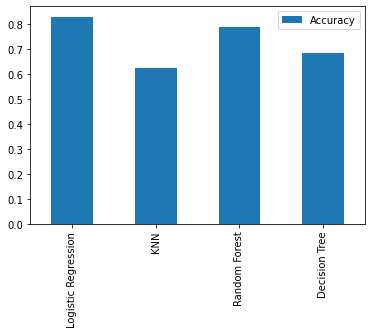

In [29]:
model_compare = pd.DataFrame(model_scores, index=['Accuracy'])
model_compare.T.plot.bar();

Now we've got a baseline model... and we know a model's first predictions aren't always what we should based our next steps off. What should we do?

Let's look at the following:

* Hypyterparameter tuning
* Feature importance
* Confusion matrix
* Cross-validation
* Precision
* Recall
* F1 score
* Classification report
* ROC curve
* Area under the curve (AUC)

### Hyperparameter tuning with RandomizedSearchCV¶

We're going to tune:

LogisticRegression()


In [179]:
# Let's create a hyperparameter grid for LogisticRegression
log_reg_grid= {'C': np.logspace(-4,4,20), 'solver':['liblinear']}



In [183]:
# Let's tune the LogisticRegression model
np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)
rs_log_reg.fit(x_train, y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   14.9s finished


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

Let's take the best parameter and test our accuracy of our model

In [184]:
rs_log_reg.score(x_test, y_test)

0.8130081300813008

In [206]:
y_pred = rs_log_reg.predict(x_test)
y_pred

array([1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1])

In [188]:
y_test

467    1
168    0
108    0
374    1
432    1
      ..
566    1
420    1
246    1
499    0
463    1
Name: Loan_Status, Length: 123, dtype: int64

### Hyperparamter Tuning with GridSearchCV

Since our LogisticRegression model provides the best scores so far, we'll try and improve them again using GridSearchCV...

In [197]:
# Different hyperparametrs for our LogisticRegression model
log_reg_grid = {'C': np.logspace(-4,4,30),
               'solver': ['liblinear']}

# Setup grid hyperparameter search for logisticRegression model
gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid=log_reg_grid,
                         cv=5,
                         verbose=True)
# fit grid hyperparameter search model
gs_log_reg.fit(x_train, y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:   20.2s finished


In [198]:
# Check the best hyperparametres
gs_log_reg.best_params_

{'C': 32.90344562312671, 'solver': 'liblinear'}

In [200]:
# Evaluate the grid search LogisticRegression model
gs_log_reg.score(x_test, y_test)

0.8130081300813008

### Evaluting our tuned machine learning classifier, beyond accuracy

* ROC curve and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-score
... and it would be great if cross-validation was used where possible.

To make comparisons and evaluate our trained model, first we need to make predictions.

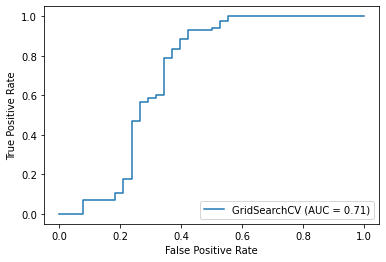

In [202]:
plot_roc_curve(gs_log_reg, x_test,y_test);

In [203]:
x_test.shape

(123, 21)

In [207]:
# Confusion Matrix
print(confusion_matrix(y_test, y_pred))

[[17 21]
 [ 2 83]]


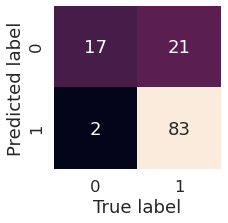

In [209]:
import seaborn as sns
sns.set(font_scale=1.5)
def plot_conf_mat(y_test, y_pred):
    fig,ax = plt.subplots(figsize=(3,3))
    ax=sns.heatmap(confusion_matrix(y_test, y_pred),
                  annot=True, cbar=False)
    plt.xlabel('True label')
    plt.ylabel('Predicted label')
plot_conf_mat(y_test, y_pred)    

Now we've got a ROC curve, an AUC metric and a confusion matrix, let's get a classification report as well as cross-validated precision, recall and f1-score.

In [210]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.45      0.60        38
           1       0.80      0.98      0.88        85

    accuracy                           0.81       123
   macro avg       0.85      0.71      0.74       123
weighted avg       0.83      0.81      0.79       123



### Calculate evaluation metrics using cross-validation

We're going to calculate accuracy, precision, recall and f1-score of our model using cross-validation and to do so we'll be using cross_val_score().

In [211]:
# Recheck for the best hyperparameters
gs_log_reg.best_params_

{'C': 32.90344562312671, 'solver': 'liblinear'}

In [213]:
# Create a new model with the best parameter
model=LogisticRegression(C=32.90344562312671, 
                         solver='liblinear')

In [216]:
# Cross-Validated accuracy
cv_acc =cross_val_score(model, x, y, cv=5, 
                        scoring='accuracy')
cv_acc

array([0.81300813, 0.77235772, 0.7804878 , 0.84552846, 0.81147541])

In [217]:
# Let's take the mean of cross-validated accuracy
cv_acc=np.mean(cv_acc)
cv_acc

0.8045715047314408

In [218]:
# cross-validated pression
cv_precision = cross_val_score(model,x,y,cv=5,
                              scoring ='precision')
cv_precision = np.mean(cv_precision)
cv_precision

0.7899124887399417

In [219]:
# Cross-validated f1
cv_f1=cross_val_score(model, x, y, cv=5, scoring='f1')
cv_f1=np.mean(cv_f1)
cv_f1

0.8731133545872372

In [220]:
# cross-validated recall 
cv_recall =cross_val_score(model, x, y, cv=5, 
                           scoring ='recall')
cv_recall=np.mean(cv_recall)
cv_recall
                           
                           

0.9763025210084034

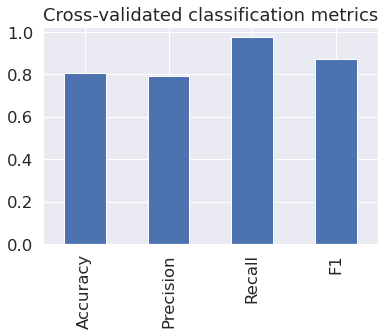

In [223]:
# Visualize cross-validation metrics
cv_metrics=pd.DataFrame({'Accuracy': cv_acc,
                        'Precision':cv_precision,
                        'Recall': cv_recall,
                        'F1': cv_f1}, index=[0])
cv_metrics.T.plot.bar(title='Cross-validated classification metrics',
                     legend=False);


In [224]:
# Fit an instance of LogisticRegression 
model = LogisticRegression(C=32.90344562312671, 
                          solver='liblinear')
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.8130081300813008

In [225]:
# Check the coeficiency 
model.coef_

array([[-2.36739970e-01,  2.33160813e-01,  9.39309383e-02,
        -4.71267467e-01,  7.03154267e-02,  1.61750238e-05,
         8.76345194e-05, -4.10852578e-03, -3.54737282e-03,
         3.10209194e+00,  5.67840058e-02, -3.71170180e-01,
         8.73847693e-02, -1.86331697e-02,  1.06761684e-01,
         1.30469808e-01, -4.63246516e-02,  0.00000000e+00,
         4.03566883e-02,  0.00000000e+00,  0.00000000e+00]])

In [226]:
# March coef's of features to colums
features_dict = dict(zip(df.columns, list(model.coef_[0])))
features_dict

{'Gender': -0.23673996985337695,
 'Married': 0.23316081311263617,
 'Dependents': 0.09393093827315939,
 'Education': -0.47126746724938523,
 'Self_Employed': 0.0703154267298197,
 'ApplicantIncome': 1.6175023834482965e-05,
 'CoapplicantIncome': 8.763451940345764e-05,
 'LoanAmount': -0.004108525780629513,
 'Loan_Amount_Term': -0.003547372819300104,
 'Credit_History': 3.1020919360170947,
 'Property_Area': 0.05678400582332462,
 'Loan_Status': -0.3711701798256083}

In [227]:
conda install -c conda-forge xgboost


Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.

# >>>>>>>>>>>>>>>>>>>>>> ERROR REPORT <<<<<<<<<<<<<<<<<<<<<<

    Traceback (most recent call last):
      File "/home/bakary/anaconda3/lib/python3.8/site-packages/urllib3/response.py", line 696, in _update_chunk_length
        self.chunk_left = int(line, 16)
    ValueError: invalid literal for int() with base 16: b''
    
    During handling of the above exception, another exception occurred:
    
    Traceback (most recent call last):
      File "/home/bakary/anaconda3/lib/python3.8/site-packages/urllib3/response.py", line 436, in _error_catcher
        yield
      File "/home/bakary/anaconda3/lib/python3.8/site-packages/urllib3/response.py", line 763, in read_chunked
        self._update_chunk_length()
      File "/home/bakary/anaconda3/lib/python3.8/site-packages/urllib3/response.py", line 7